In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [24]:
import csv
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [ ]:
uploaded=files.upload()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cp /content/drive/MyDrive/Data/Sign_Language_MNIST/sign_mnist_test.csv ./
!cp /content/drive/MyDrive/Data/Sign_Language_MNIST/sign_mnist_train.csv ./

In [26]:
with open('sign_mnist_train.csv') as f:
  csv_reader = csv.reader(f, delimiter=',')
  first_row = True
  labels_temp = []
  images_temp = []
  for row in tqdm(csv_reader):
    if not first_row:
      label = row[0]
      image_flatten = row[1:785]
      image = np.array_split(image_flatten, 28)
      images_temp.append(image)
      labels_temp.append(label)
    else:
      first_row = False
  images = np.array(images_temp).astype(float)
  labels = np.array(labels_temp).astype(float)

27456it [00:06, 4124.86it/s]


In [28]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      csv_reader = csv.reader(training_file, delimiter=',')
      first_row = True
      labels_temp = []
      images_temp = []
      for row in csv_reader:
        if not first_row:
          label = row[0]
          image_flatten = row[1:785]
          image = np.array_split(image_flatten, 28)
          images_temp.append(image)
          labels_temp.append(label)
        else:
          first_row = False
      images = np.array(images_temp).astype(float)
      labels = np.array(labels_temp).astype(float)
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [29]:
training_images.shape

(27455, 28, 28)

In [32]:
a = np.expand_dims(training_images, axis=3)

In [33]:
a.shape

(27455, 28, 28, 1)

In [35]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(
    rescale=1./255.)

    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [46]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

# Compile Model. 
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

# Train the Model
history = model.fit(train_datagen.flow(training_images, training_labels),
                    epochs = 15,
                    validation_data = validation_datagen.flow(testing_images, testing_labels),
                    )

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]

Epoch 1/15
858/858 [==============================] - 28s 32ms/step - loss: 2.7710 - accuracy: 0.1611 - val_loss: 2.0299 - val_accuracy: 0.2968
Epoch 2/15
858/858 [==============================] - 26s 31ms/step - loss: 2.0678 - accuracy: 0.3462 - val_loss: 1.6026 - val_accuracy: 0.4537
Epoch 3/15
858/858 [==============================] - 26s 31ms/step - loss: 1.7387 - accuracy: 0.4406 - val_loss: 1.2983 - val_accuracy: 0.5498
Epoch 4/15
858/858 [==============================] - 26s 31ms/step - loss: 1.5296 - accuracy: 0.5036 - val_loss: 1.0734 - val_accuracy: 0.6214
Epoch 5/15
858/858 [==============================] - 27s 31ms/step - loss: 1.3716 - accuracy: 0.5545 - val_loss: 0.9873 - val_accuracy: 0.6513
Epoch 6/15
858/858 [==============================] - 27s 32ms/step - loss: 1.2707 - accuracy: 0.5848 - val_loss: 0.9181 - val_accuracy: 0.6882
Epoch 7/15
858/858 [==============================] - 27s 31ms/step - loss: 1.1634 - accuracy: 0.6174 - val_loss: 0.7973 - val_accuracy:

[192.67979431152344, 0.6288343667984009]

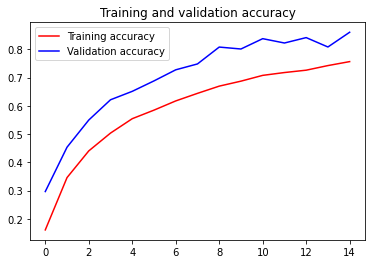

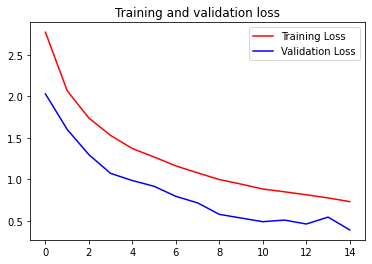

In [49]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()